<a href="https://colab.research.google.com/github/Sanketkamble01/Playstore-app-review-analysis/blob/main/Group_colab_EDA_capstone_work_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Introduction to topic**

> Play Store is the biggest market for Android apps worldwide.In playstore there are so many different types of app.On google play store there are more than 5 million applications with more than 3 billion active user across more than 190 countries.
#**Problem statements**
*    what are the top categores on playstore?
**   How importance is the rating of application? *  
**   Most percentage of content on Play Store?
**   Which category has the most number of installation? 
**   check correlation 
**   mostly used words on playstore reviews?  
**   Relationship between content Rating in Free and paid apps? 
**   What are the sentiments across database? 
**   How size impacts on intstallation of apps?


# **About data**

> This project provides us with two CSV files 'play store data.csv' and 'user reviws.csv'. In first csv file 13 columns are given in that columns all information about apps like size,installs,ratings etc are given.Second csv file contain Sentiment, Sentiment Polarity and Sentiment Subjectivity.


In [ ]:
import pandas as pd

In [ ]:
#importing necessary librariesa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read CSV files
df_dataset1= pd.read_csv('/content/drive/MyDrive/Capstone Project/Play Store Data.csv')
df_dataset2 = pd.read_csv('/content/drive/MyDrive/Capstone Project/User Reviews.csv')

In [ ]:
df_dataset1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_dataset1.shape

(10841, 13)

In [ ]:
df_dataset2.shape

(64295, 5)

In [ ]:
df_dataset1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df_dataset1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **Data cleaning:**

> This is the most importent part of project.Validate and cleanse the data is the essential for eliminating inaccurate data and completing gaps. Here are several key duties

*   deleting unnecessary data
*   completing blank values.


For a given application, a dataset might contain duplicate values we need to remove it.



In [ ]:
#Drop the all null values
df_dataset1.dropna(how = 'any',inplace = True)

In [ ]:
df_dataset1.dropna(how = 'any',inplace = True)

In [ ]:
# Now we check the duplicacy of data by counting all unique apps- total apps
total = df_dataset1.shape[0]
unique=len(df_dataset1['App'].unique())
duplicate=total-unique
print('total number of apps in play store data is:',total)
print('total number of unique apps in playstore data is:',unique)
print('total number of duplicate apps in playstore is:',duplicate)

total number of apps in play store data is: 9360
total number of unique apps in playstore data is: 8190
total number of duplicate apps in playstore is: 1170


In [ ]:
df_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [ ]:
df_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB





*   In playstore dataset we have entries of size , installs and price with special characters like 'M','+','$' respectively.
 
*   This prevents columns from 
being purely numerical,making their use in furture mathematics difficult.

*   we need to remove this special characters(M,+,$) 


* Also we need Size column in on format



In [ ]:
def format(value):
  if value[-1:] == "k":
     return float(value[0:-1])/1000
  elif value[-1:] == "M":
     return  value
  else:
     return np.nan 
df_dataset1.rename(columns = {'Size':'Size(Mb)'}, inplace = True)  

df_dataset1["Size(Mb)"]=df_dataset1["Size(Mb)"].map(lambda x: format(x))
 
df_dataset1["Size(Mb)"]=df_dataset1["Size(Mb)"].apply(lambda x: str(x).replace('M',"") if 'M' in str(x) else x)

In [ ]:
# replace "$" 
df_dataset1["Price"]=df_dataset1["Price"].str.replace("$","")
# replace  "+" and "," it with an empty string
df_dataset1["Installs"]=df_dataset1["Installs"].str.replace("+","").str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Above columns data type is 'object' because it has combination of numerical data and special charactries.  For further analysis we need to change data type to float

In [ ]:
# Change the data type to float
df_dataset1["Reviews"]=pd.to_numeric(df_dataset1["Reviews"])
df_dataset1["Installs"]=df_dataset1["Installs"].astype(float)
df_dataset1["Price"]=df_dataset1["Price"].astype(float)
df_dataset1["Size(Mb)"]=df_dataset1["Size(Mb)"].astype(float)

In [ ]:
df_dataset2.info()

In [ ]:
df_dataset1.info()

In [ ]:
df_dataset1.isnull().sum()

In [ ]:
df_dataset2.isnull().sum()

# **Data visulaization**

**Find the total numbers of apps in each category and number of Installs in each category**

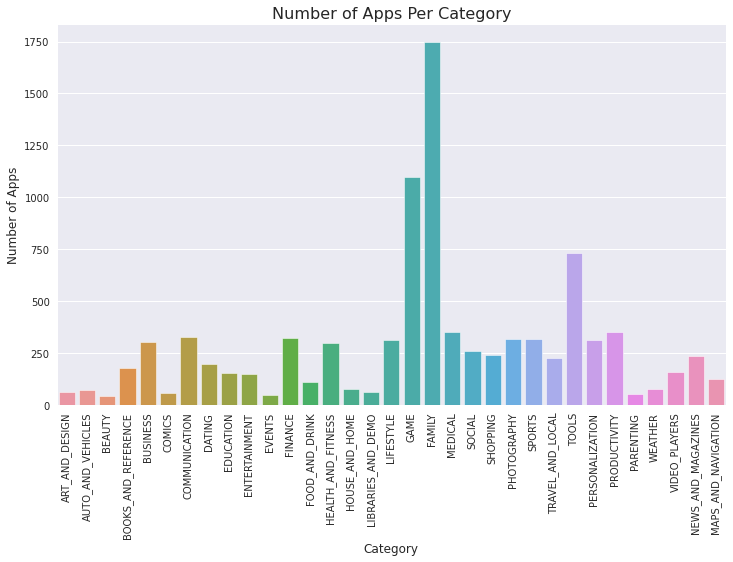

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 7))
sns.countplot(x='Category', data=df_dataset1)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Now see Number of Installs in each category. We can compare installs column with Category column

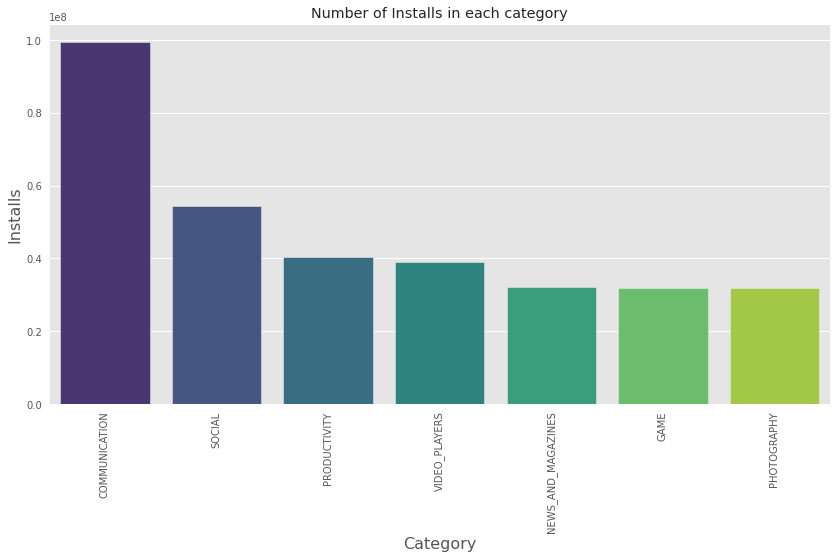

In [ ]:
A=(df_dataset1.groupby("Category").agg({"Installs":"mean"}).sort_values(by="Installs",ascending=False).reset_index().head(7))
B=pd.DataFrame(A)
plt.figure(figsize=(14,7))
plt.style.use("ggplot")
sns.barplot(y="Installs",x="Category",data=B,palette="viridis")
plt.xlabel("Category", fontsize=16)
plt.ylabel("Installs", fontsize=16)
plt.title("Number of Installs in each category")
plt.xticks(rotation=90)
plt.show();

# **conclusion**


*   Here, we can see clearly in first graph that family category is on top position in terms of total number of apps,followed by game,persolization category
and Beauty category is on bottom postion in terms of total number of apps
*   In second graph we can see COMMUNICATION is on top then SOCIAL is on second in FAMILY category is not in the list of number of Installs in each category



**show the distribution of rating**

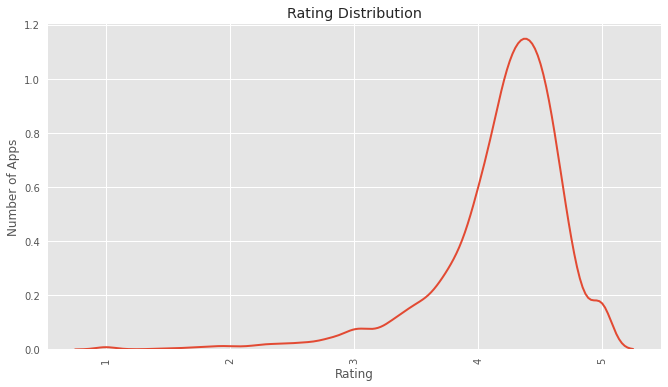

In [ ]:
plt.figure(figsize=(11, 6))
sns.kdeplot(x='Rating', data=df_dataset1)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

# **Conclusion**



*   As we can see clearly from above bar graph that approx more than 1000 apps have a 4.5 rating.
*   Left skewed histogram is showing us most of the apps is highly rated and less number of apps is low rated .
* 4.4 is highest number of apps rating



**It's time to see impact of ratings on Number of installations.**

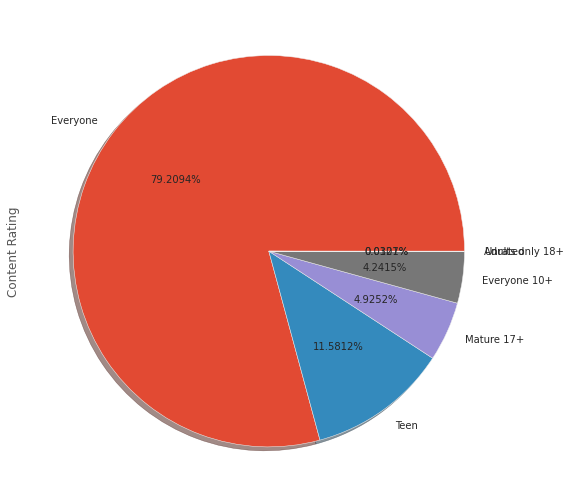

In [ ]:
plt.figure(figsize=(13,9))
pd.value_counts(df_dataset1["Content Rating"]).plot(kind = 'pie',  autopct='%2.4f%%', shadow=True)
plt.show()

# **Conclusion**
from above pie cart we can say clearly that maximum percentage of content ,installed on playstore is for Everyone,followed by Teen Mature17+ ,etc

**Now let's compare between two intresting category free v/s paid apps.** 

**let's see first by category type and then contantraing type**

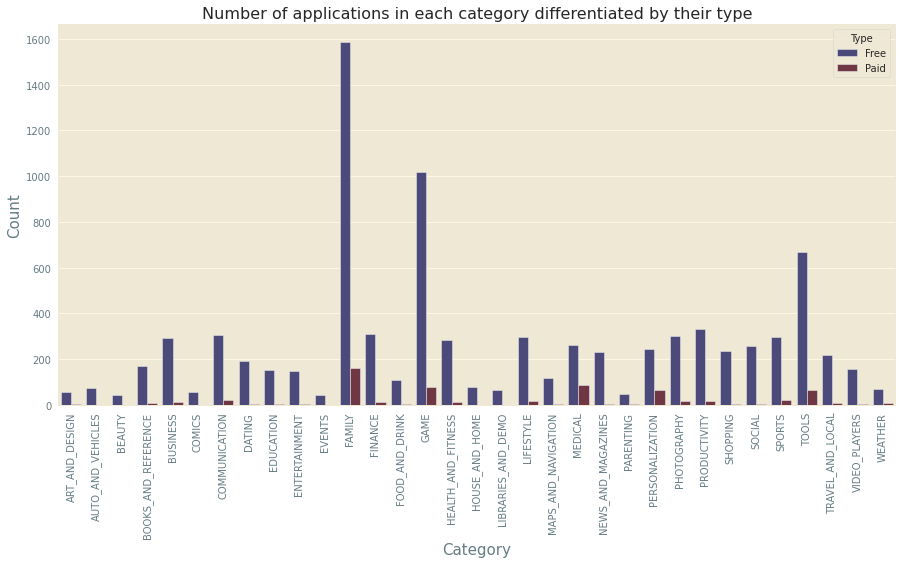

In [ ]:
ds1=df_dataset1.groupby(["Category","Type"])["App"].count().reset_index()
ds2=pd.DataFrame(ds1)
#plot the graph
plt.figure(figsize=(15,7))
plt.style.use("Solarize_Light2")
sns.barplot(x="Category",y="App",hue="Type",data=ds2,palette="icefire")
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Number of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


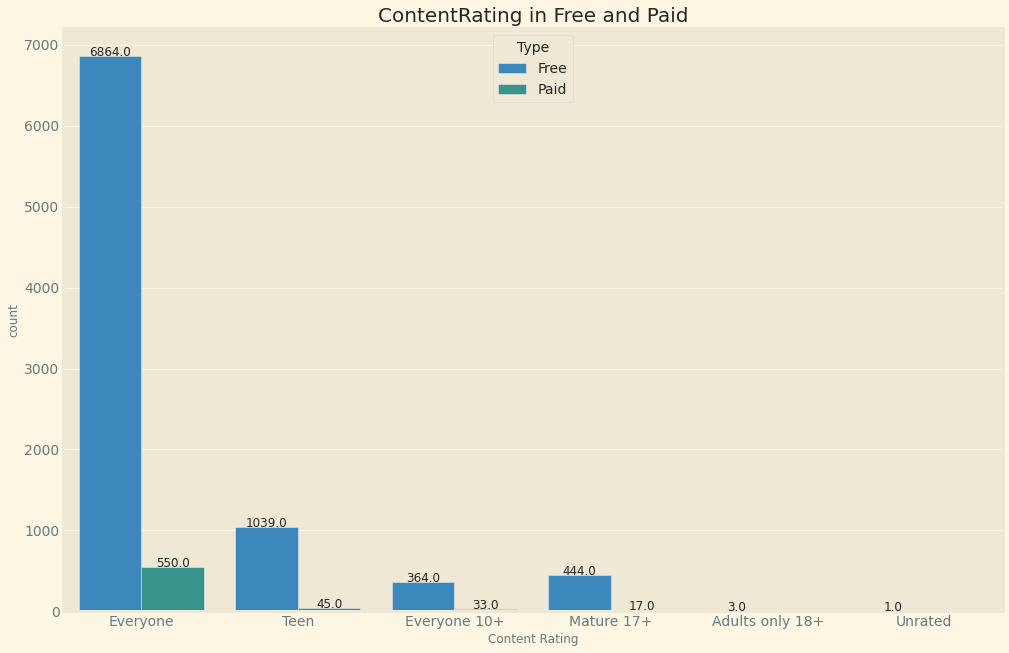

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df_dataset1['Content Rating'],hue=df_dataset1['Type']);
plt.title("ContentRating in Free and Paid",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

# **Conclusion**


*   From first graph we can conclude that mejority categories have most free Apps than paid Apps.In play store dataset most of the Apps in Family,Games & tools are free to install. In parallel,the family,personalization and medicine categories accounted for largest number of paid apps to download
*   with the help of second graph we can say that in the context  Content Rating , everyone has a maximum number of free apps on playstore .



# **Sentimental Data Across all the Reviews** 

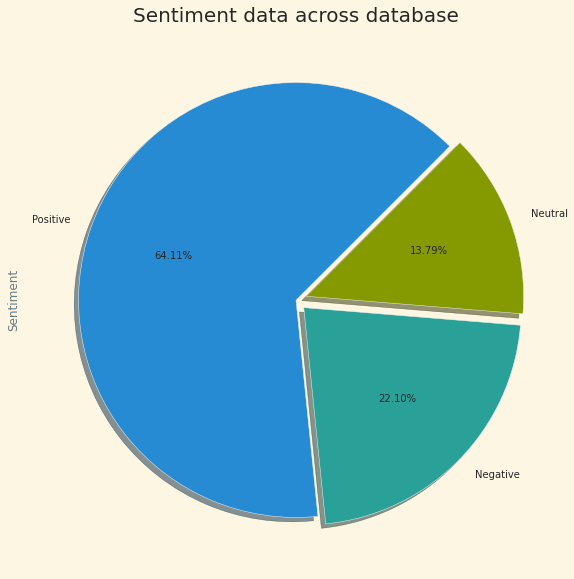

In [ ]:
plt.figure(figsize=(15,10))
pd.value_counts(df_dataset2["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 )
plt.title("Sentiment data across database",size=20)
plt.show()

# **Conclusion:**

> conclusion of above pie chart is positive reviews for all apps is higher than negative and neutral.

# **correlation:**


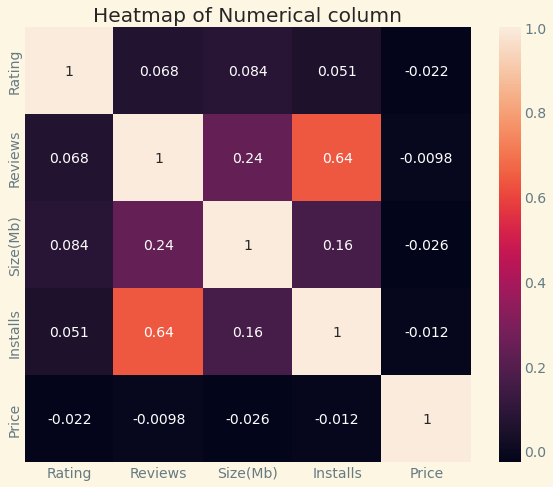

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Heatmap of Numerical column")
sns.heatmap(df_dataset1.corr(),annot=True,robust=True)
plt.show();

**Conclusion:**

> There is a strong correlation between installs and reviews that is 0.64.It is positively co-related

**let's we mostly use words in Translated review**

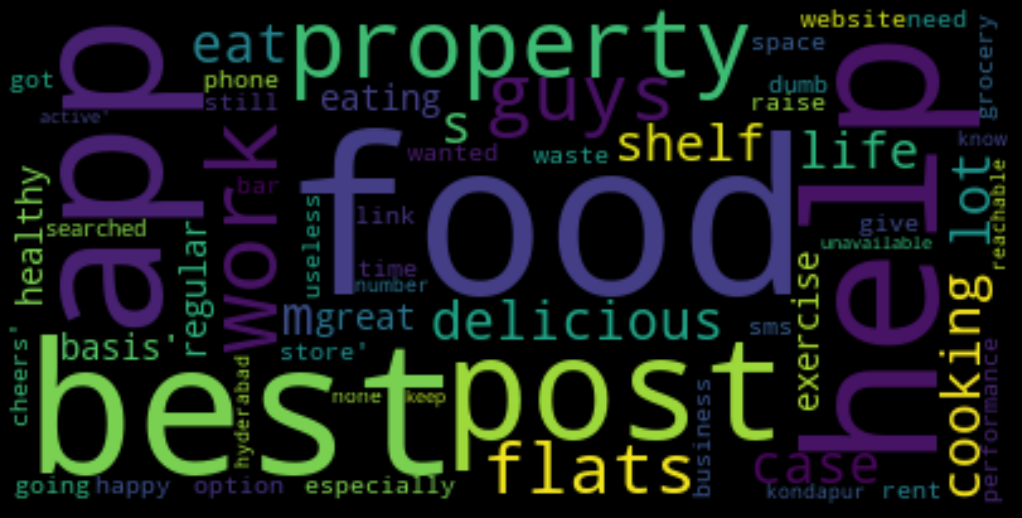

In [ ]:
stopword = df_dataset2[df_dataset2['Translated_Review'].notnull()]

from wordcloud import WordCloud, STOPWORDS
text = stopword.Translated_Review.values
wordcloud = WordCloud(stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(figsize = (14,7),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Conclusion**

> Here are few mostly used words: Food,best,app,help,work 

**now compare size with installation and see Size impate on no. of installsation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


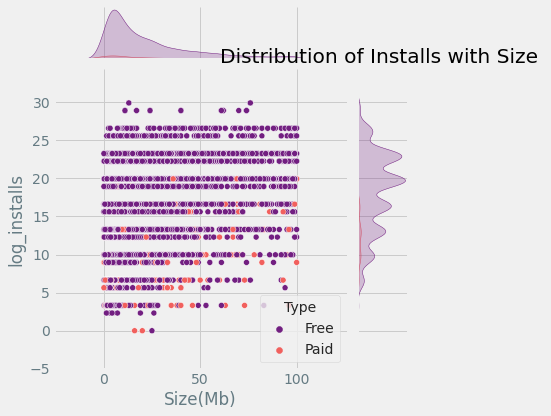

In [ ]:
df_dataset1['log_installs'] = np.log2(df_dataset1['Installs'])
sns.jointplot(df_dataset1['Size(Mb)'],df_dataset1['log_installs'],hue=df_dataset1["Type"],palette="magma")
plt.title("Distribution of Installs with Size ",color = "black")
plt.show();

**Conclusion:**

> Above plot clearly indicates that size of apps are directly impact on number of instllations. Apps in bigger size are less installed.

**Analyze the size of Apps**

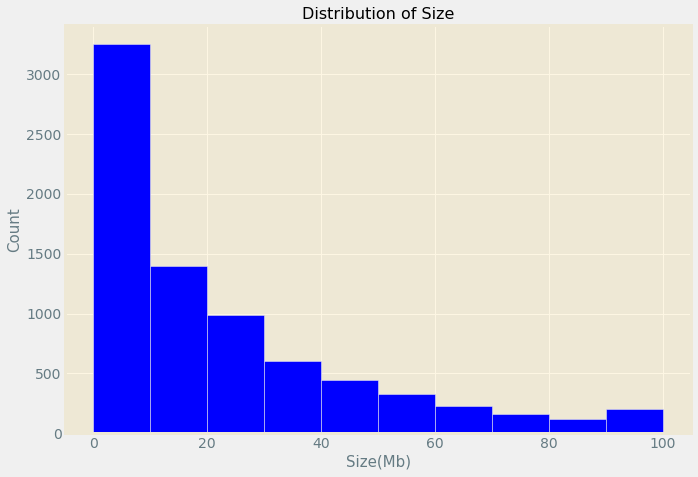

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("Solarize_Light2")
plt.hist(df_dataset1['Size(Mb)'],color="blue")
plt.xlabel("Size(Mb)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Distribution of Size",color = "black")
plt.show();

**Conclusion:**

> Above graph says that most of the apps is smaller in size

# **Summary**






Dhruve


Pratiksha

Deepankar


Komal


Sanket